In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tour = pd.read_csv("estat_tour_cap_nat.tsv.gz", compression='gzip', sep='\t')
tour.head()

,"freq,accomunit,unit,nace_r2,geo\TIME_PERIOD",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"A,BEDPL,NR,I551,AT",650559,654127,653586,651003,650020,646125,640199,633601,584889,...,600342,601945,609393,615541,607010,608836,601641,610655,610755,:
1,"A,BEDPL,NR,I551,BE",93710,86472,101804,108205,108811,114887,117299,117513,116297,...,129307,129232,129456,136406,137484,139565,139252,144015,148173,:
2,"A,BEDPL,NR,I551,BG",262966,154350,124680,127450,114400,118112,107111,99953,112002,...,279090,281869,293494,286219,288027,233549,255058,294183,299081,:
3,"A,BEDPL,NR,I551,CH",269759,267067,266150,265136,264824,264983,262471,261482,260290,...,273507,271710,275203,274792,273849,:,280471,:,287412,:
4,"A,BEDPL,NR,I551,CY",57602,61871,68066,72211,74671,77259,83517,83288,85161,...,84426,83251,84977,86252,89200,89912,89626,87227,83871,:


In [3]:
isoc = pd.read_csv("estat_isoc_ci_dev_i.tsv.gz", compression='gzip', sep='\t')
isoc.head()

,"freq,ind_type,indic_is,unit,geo\TIME_PERIOD",2016,2018,2021,2023
0,"A,CB_EU_FOR,I_IUG_DKPC,PC_IND,AL",:,: u,:,:
1,"A,CB_EU_FOR,I_IUG_DKPC,PC_IND,AT",37.41,42.45,39.62,40.34
2,"A,CB_EU_FOR,I_IUG_DKPC,PC_IND,BA",:,47.02,:,:
3,"A,CB_EU_FOR,I_IUG_DKPC,PC_IND,BE",41.45,35.53,28.30,28.36
4,"A,CB_EU_FOR,I_IUG_DKPC,PC_IND,BG",40.80 u,39.81 u,: u,30.98 u


In [4]:
# 첫 번째 데이터셋
df1 = pd.read_csv('estat_tour_cap_nat.tsv.gz', compression='gzip', sep=r'\t|,', engine='python')
# print(df1.columns)
df1.columns = df1.columns.str.strip()
df1 = df1.rename(columns={'geo\TIME_PERIOD': 'geo'})
df1 = df1[(df1['accomunit'] == 'BEDPL') & (df1['unit'] == 'NR') & (df1['nace_r2'] == 'I551')]
df1 = df1[['geo', '2016']]
df1 = df1[~df1['2016'].astype(str).str.contains(':|u|bu')]
df1 = df1[~df1['geo'].isin(['EA', 'EU27_2007', 'EU27_2020', 'EU28'])]
df1['2016'] = pd.to_numeric(df1['2016'])
df1 = df1.dropna(subset=['geo'])

# 두 번째 데이터셋
df2 = pd.read_csv('estat_isoc_ci_dev_i.tsv.gz', compression='gzip', sep=r'\t|,', engine='python')
# print(df2.columns)
df2.columns = df2.columns.str.strip()
df2 = df2.rename(columns={'geo\TIME_PERIOD': 'geo'})
df2 = df2[(df2['ind_type'] == 'IND_TOTAL') & (df2['indic_is'] == 'I_IUG_TV') & (df2['unit'] == 'PC_IND')]
df2 = df2[['geo', '2016']]
df2 = df2[~df2['2016'].astype(str).str.contains(':|u|bu')]
df2 = df2[~df2['geo'].isin(['EA', 'EU27_2007', 'EU27_2020', 'EU28'])]
df2['2016'] = df2['2016'].str.replace(' b', '')
df2['2016'] = pd.to_numeric(df2['2016'])
df2 = df2.dropna(subset=['geo'])

merged_df = pd.merge(df1.set_index('geo'), df2.set_index('geo'), on='geo', suffixes=('_Number of Bed-places', '_Percentage of individuals'))

merged_df.to_csv('merged_df.csv', index=True)
loaded_df = pd.read_csv('merged_df.csv', index_col=0)
loaded_df

,2016_Number of Bed-places,2016_Percentage of individuals
geo,,
AT,601945,14.78
BE,129232,9.89
BG,281869,3.71
CY,83251,6.41
CZ,317756,5.32
DE,1784654,17.88
DK,90503,22.02
EE,32404,11.44
EL,797995,4.73


In [5]:
correlation = loaded_df[['2016_Number of Bed-places', '2016_Percentage of individuals']].corr()
correlation

,2016_Number of Bed-places,2016_Percentage of individuals
2016_Number of Bed-places,1.000000,0.045991
2016_Percentage of individuals,0.045991,1.000000


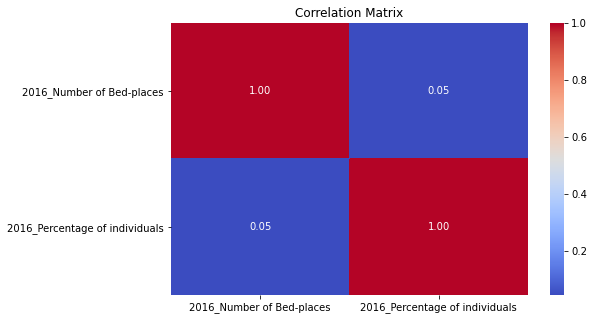

In [6]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

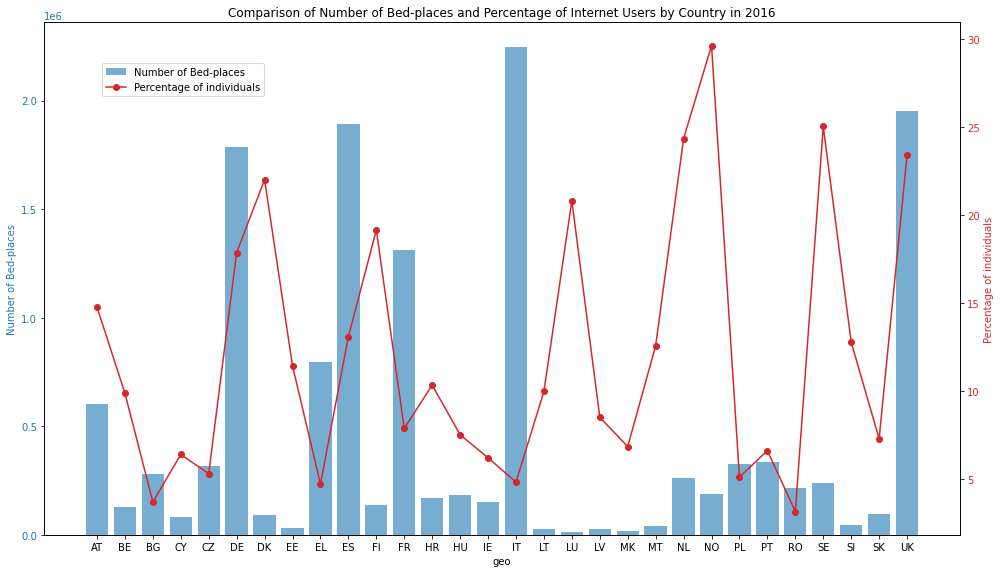

In [7]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# 첫 번째 축: Number of Bed-places
color = 'tab:blue'
ax1.set_xlabel('geo')
ax1.set_ylabel('Number of Bed-places', color=color)
ax1.bar(loaded_df.index, loaded_df['2016_Number of Bed-places'], color=color, alpha=0.6, label='Number of Bed-places')
ax1.tick_params(axis='y', labelcolor=color)

# 두 번째 축: Percentage of individuals
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage of individuals', color=color)
ax2.plot(loaded_df.index, loaded_df['2016_Percentage of individuals'], color=color, marker='o', linestyle='-', label='Percentage of individuals')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

fig.tight_layout()
plt.title('Comparison of Number of Bed-places and Percentage of Internet Users by Country in 2016')
plt.show()

In [8]:
loaded_df['Rank_Number of Bed-places'] = loaded_df['2016_Number of Bed-places'].rank(ascending=False)
loaded_df['Rank_Percentage of individuals'] = loaded_df['2016_Percentage of individuals'].rank(ascending=False)

loaded_df['Average_Rank'] = (loaded_df['Rank_Number of Bed-places'] + loaded_df['Rank_Percentage of individuals']) / 2

final_df = loaded_df.sort_values(by='Average_Rank', ascending=True)

final_df[['2016_Number of Bed-places', '2016_Percentage of individuals', 'Rank_Number of Bed-places', 'Rank_Percentage of individuals', 'Average_Rank']]

,2016_Number of Bed-places,2016_Percentage of individuals,Rank_Number of Bed-places,Rank_Percentage of individuals,Average_Rank
geo,,,,,
UK,1950485,23.43,2.0,4.0,3.0
DE,1784654,17.88,4.0,8.0,6.0
ES,1893978,13.11,3.0,10.0,6.5
SE,240883,25.04,13.0,2.0,7.5
NL,261164,24.35,12.0,3.0,7.5
NO,187943,29.63,15.0,1.0,8.0
AT,601945,14.78,7.0,9.0,8.0
FR,1312372,7.89,5.0,18.0,11.5
FI,135177,19.16,19.0,7.0,13.0


#### 상관관계 분석 결과 및 유럽 진출 전략
2016년 **숙박시설 수(Number of Bed-places)**와 TV **사용률(Percentage of individuals)** 간의 상관관계를 분석하였습니다. 상관관계 분석 결과, 두 변수 간의 상관계수가 0.045로 낮게 나타났습니다. 이는 숙박시설 수와 TV 사용률 간에 상관관계가 거의 없음을 알 수 있습니다.

이러한 결과를 바탕으로, 두 변수를 별도로 분석하여 유럽 시장 진출 전략을 수립하기 위해 다음과 같은 절차를 수행하였습니다.

1. **숙박시설 수와 TV 사용률 각각에 대해 순위를 매기기**: 각 국가별로 숙박시설 수와 TV 사용률의 순위를 산정하였습니다.

2. **평균 순위 계산**: 두 변수의 순위 평균을 계산하여 각 국가의 종합 순위를 도출하였습니다.

이 접근 방식을 통해, 종합 순위가 높은 국가들을 우선적으로 고려하여 유럽 시장 진출 전략을 수립하고자 합니다. 숙박시설 수와 TV 사용률이 균형 잡힌 국가들을 타겟으로 삼아 보다 효과적인 시장 진출을 목표로 합니다.